In [1]:
# import sys
# print(sys.executable)

In [2]:
# !/Users/amin/anaconda3/bin/python -m pip install install scikit_learn

In [3]:
# !pip3 install scikit_learn
# !pip3 install -U scikit-learn scipy matplotlib

In [4]:
# import eli5

In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tabulate import tabulate
import regex as re
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import learning_curve

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

from nltk.corpus import stopwords

import pickle
import sys

import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import joblib
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import os

### Check out the ROC curves

In [6]:
models = os.listdir('../Codes/')
models

['ROC_mlp_vec_DF_P04_01.npy',
 'ROC_mlp_Norm_EDA_DF_P04_01.npy',
 'P04_03_Voting_Modeling.ipynb',
 'P03_Exploratory_Data_Analysis.ipynb',
 'ROC_lr_Norm_EDA_DF_P04_01.npy',
 'P01_Gathering_Data.ipynb',
 'ROC_mlp_All_DF_P04_02.npy',
 'ROC_mlp_best_HYP_EDA_DF_P04_01.npy',
 'P02_Cleaning_Data.ipynb',
 'ROC_gboost_EDA_DF_bestHyper_P04_01.npy',
 'Models',
 'ROC_lr_EDA_DF_P04_01.npy',
 'ROC_gboost_vec_DF_P04_01.npy',
 'ROC_gboost_Norm_EDA_DF_P04_01.npy',
 'P04_02_Modeling.ipynb',
 'ROC_lr_All_DF_P04_02.npy',
 '.ipynb_checkpoints',
 'ROC_lr_vec_DF_P04_01.npy',
 'ROC_mlp_vec_DF_best_HYP_P04_01.npy',
 'P04_01_Modeling.ipynb',
 'P05_Modeling_ROC.ipynb']

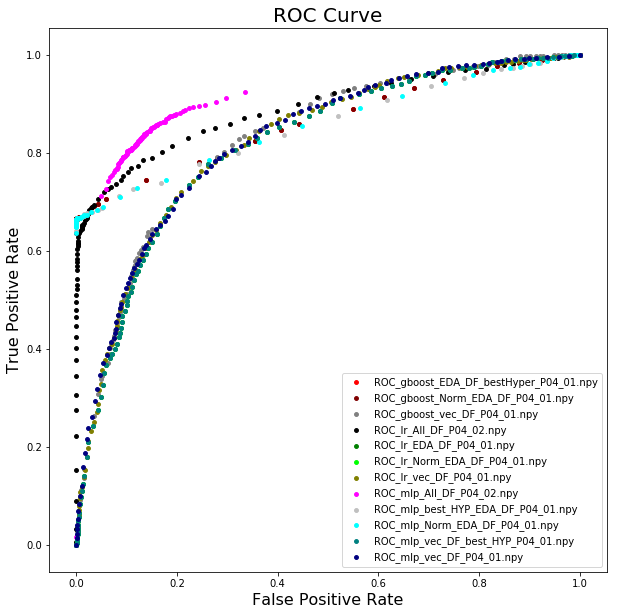

In [7]:

ROC_list = ['ROC_gboost_EDA_DF_bestHyper_P04_01.npy',
             'ROC_gboost_Norm_EDA_DF_P04_01.npy',
             'ROC_gboost_vec_DF_P04_01.npy',
             'ROC_lr_All_DF_P04_02.npy',
             'ROC_lr_EDA_DF_P04_01.npy',
             'ROC_lr_Norm_EDA_DF_P04_01.npy',
             'ROC_lr_vec_DF_P04_01.npy',
             'ROC_mlp_All_DF_P04_02.npy',
             'ROC_mlp_best_HYP_EDA_DF_P04_01.npy',
             'ROC_mlp_Norm_EDA_DF_P04_01.npy',
             'ROC_mlp_vec_DF_best_HYP_P04_01.npy',
             'ROC_mlp_vec_DF_P04_01.npy']


colors = ['Red','Maroon','Gray','Black',
          'Green','Lime','Olive','Fuchsia',
          'Silver','Aqua','Teal','Navy']

# sns.set()
plt.figure(figsize=(10,10))

for i, roc in enumerate(ROC_list):
    with open(roc, 'rb') as ROC_np:
        ROC_np = np.load(ROC_np)
        
    plt.scatter(ROC_np[:,0],
                ROC_np[:,1], 
                color=colors[i], s=15, label=roc)
    
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.savefig("../Figures/plot_05_ROC.png")    

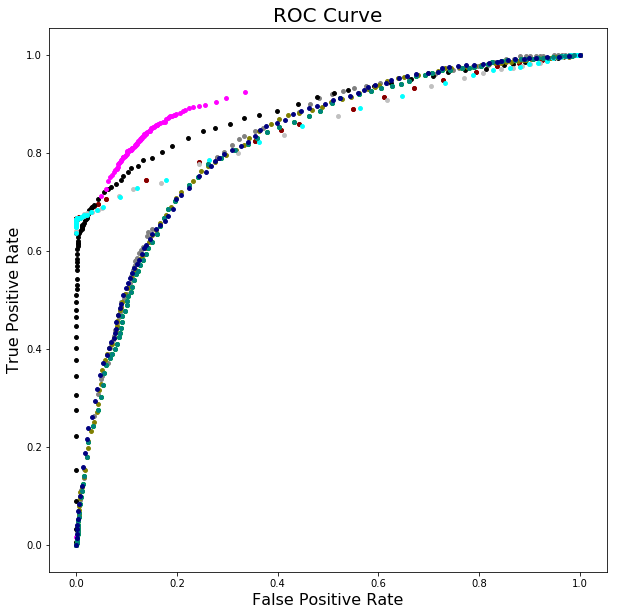

In [8]:

ROC_list = ['ROC_gboost_EDA_DF_bestHyper_P04_01.npy',
             'ROC_gboost_Norm_EDA_DF_P04_01.npy',
             'ROC_gboost_vec_DF_P04_01.npy',
             'ROC_lr_All_DF_P04_02.npy',
             'ROC_lr_EDA_DF_P04_01.npy',
             'ROC_lr_Norm_EDA_DF_P04_01.npy',
             'ROC_lr_vec_DF_P04_01.npy',
             'ROC_mlp_All_DF_P04_02.npy',
             'ROC_mlp_best_HYP_EDA_DF_P04_01.npy',
             'ROC_mlp_Norm_EDA_DF_P04_01.npy',
             'ROC_mlp_vec_DF_best_HYP_P04_01.npy',
             'ROC_mlp_vec_DF_P04_01.npy']


colors = ['Red','Maroon','Gray','Black',
          'Green','Lime','Olive','Fuchsia',
          'Silver','Aqua','Teal','Navy']

# sns.set()
plt.figure(figsize=(10,10))

for i, roc in enumerate(ROC_list):
    with open(roc, 'rb') as ROC_np:
        ROC_np = np.load(ROC_np)
        
    plt.scatter(ROC_np[:,0],
                ROC_np[:,1], 
                color=colors[i], s=15, label=roc)
    
plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
# plt.legend()
plt.savefig("../Figures/plot_05_ROC_2.png")    

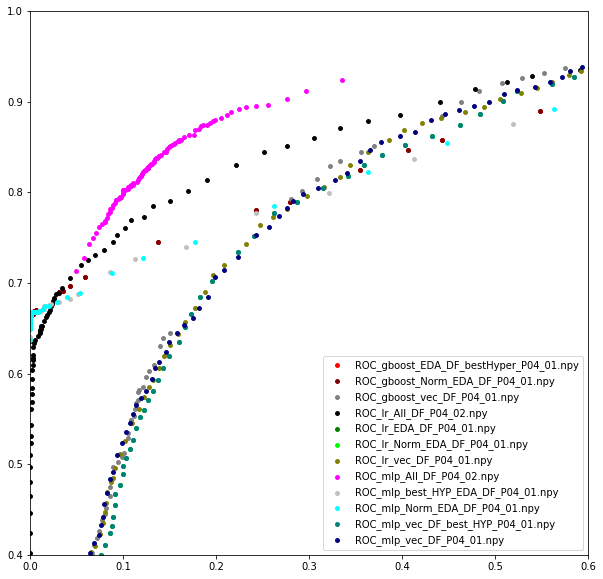

In [9]:

ROC_list = ['ROC_gboost_EDA_DF_bestHyper_P04_01.npy',
             'ROC_gboost_Norm_EDA_DF_P04_01.npy',
             'ROC_gboost_vec_DF_P04_01.npy',
             'ROC_lr_All_DF_P04_02.npy',
             'ROC_lr_EDA_DF_P04_01.npy',
             'ROC_lr_Norm_EDA_DF_P04_01.npy',
             'ROC_lr_vec_DF_P04_01.npy',
             'ROC_mlp_All_DF_P04_02.npy',
             'ROC_mlp_best_HYP_EDA_DF_P04_01.npy',
             'ROC_mlp_Norm_EDA_DF_P04_01.npy',
             'ROC_mlp_vec_DF_best_HYP_P04_01.npy',
             'ROC_mlp_vec_DF_P04_01.npy']


colors = ['Red','Maroon','Gray','Black',
          'Green','Lime','Olive','Fuchsia',
          'Silver','Aqua','Teal','Navy']

# sns.set()
plt.figure(figsize=(10,10))

for i, roc in enumerate(ROC_list):
    with open(roc, 'rb') as ROC_np:
        ROC_np = np.load(ROC_np)
        
    plt.scatter(ROC_np[:,0],
                ROC_np[:,1], 
                color=colors[i], s=15, label=roc)
    
# plt.title('ROC Curve',fontsize=20)
# plt.xlabel('False Positive Rate',fontsize=16)
# plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.xlim(0,0.6);plt.ylim(0.4,1)
plt.savefig("../Figures/plot_05_ROC_3.png")    